# Mini Tutorials and Code Snippets

Version V001, 2022-07-10, rb

## Vectorized Operations 

Pandas dataframes and their columns work like numpy arrays. They allow vectorized operations. Use vectorized operations as much as possible!
<br>Vectorized operations are operating on all elements (cells) of a numpy or pandas data structure at once. They are fast and easy to use.
<br>This very short tutorial is not comprehensive! See the official pandas documentation and tutorials.

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Example dataframe
df_tmp = pd.DataFrame(
    {'x' : [1.0, 2.0, 3.0, 4.0],
     'y' : [3., 1., 4., 1.],
     'z' : np.zeros(4)
    })
df_tmp

,x,y,z
0,1.0,3.0,0.0
1,2.0,1.0,0.0
2,3.0,4.0,0.0
3,4.0,1.0,0.0


In [3]:
# Calculations on all elements (aka cells) of a whole data frame in one pass
(df_tmp + 7) * 5

,x,y,z
0,40.0,50.0,35.0
1,45.0,40.0,35.0
2,50.0,55.0,35.0
3,55.0,40.0,35.0


In [4]:
# Operations on columns (= pandas series)
2/df_tmp['x'] + df_tmp['y']/2

0    3.500000
1    1.500000
2    2.666667
3    1.000000
dtype: float64

In [5]:
# Storing the results in an existing column
df_tmp['z'] = 2/df_tmp['x'] + df_tmp['y']/2
df_tmp

,x,y,z
0,1.0,3.0,3.500000
1,2.0,1.0,1.500000
2,3.0,4.0,2.666667
3,4.0,1.0,1.000000


In [6]:
# Store the results in a new column z2
df_tmp['z2'] = df_tmp['x']**2 / df_tmp['z']
df_tmp

,x,y,z,z2
0,1.0,3.0,3.500000,0.285714
1,2.0,1.0,1.500000,2.666667
2,3.0,4.0,2.666667,3.375000
3,4.0,1.0,1.000000,16.000000


In [7]:
# Operations on rows
df_tmp.iloc[2]/10.

x     0.300000
y     0.400000
z     0.266667
z2    0.337500
Name: 2, dtype: float64

## Cumulative Precipitation Sum

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Precipitation height in mm, aggregated over five minutes
# Value 2 means: 2 mm of rain have fallen during the last 5 minutes. 
p = np.array([0, 0, 1, 1, 0, 1, 2, 0, 0, 2, 1, 0, 0])
N = len(p)

# minute vector 
Dt = 5. # prec. aggregated over 5 minutes 
t = np.linspace(0,(N-1)*Dt,N) 

# Cumulative sum of precipitation values 
cp = p.cumsum()

# Final values
cp_last = cp[-1]
t_last  =  t[-1]

print("p: ", p)
print("cp:", cp)
print("t: ", t)
print(f"\nIn the last {t_last:.0f} minutes {cp_last:.1f} mm of rain fell.\n")

p:  [0 0 1 1 0 1 2 0 0 2 1 0 0]
cp: [0 0 1 2 2 3 5 5 5 7 8 8 8]
t:  [ 0.  5. 10. 15. 20. 25. 30. 35. 40. 45. 50. 55. 60.]

In the last 60 minutes 8.0 mm of rain fell.



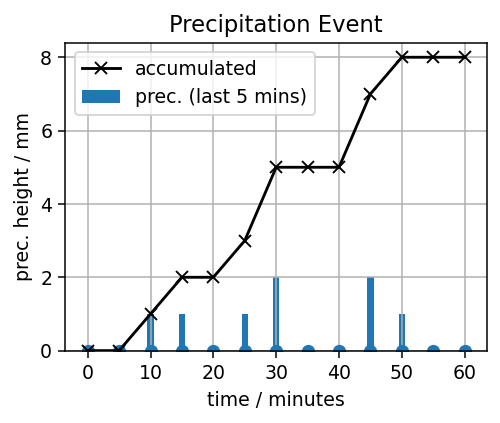

In [10]:
fig,ax = plt.subplots(figsize=(4,3), dpi = 136)
ax.bar(t,p,width=Dt*.2,label="prec. (last 5 mins)")
ax.plot(t,0*t,"o")
ax.plot(t, cp, color="black", marker="x", label="accumulated")
ax.grid(True)
ax.set_title("Precipitation Event")
ax.set_xlabel("time / minutes")
ax.set_ylabel("prec. height / mm")
ax.legend()
plt.show()

## Plotting Temperature Profiles in Walls

This procedure is useful for plotting temperature profiles in walls when only temperature drops $\Delta T_k$ are given.

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# increments, Deltas
Dx = np.array([10,5,25,10])  # Delta x, x increments
DT = -np.array([2,8,18,2])   # Delta T, T increments

x = Dx.cumsum() # cumulative sum of x
T = Dy.cumsum() # cumulative sum of the Delta Ts

print("Dx:", Dx)
print("x: ", x)
print()
print("DT:", DT)
print("T :", T)

NameError: name 'Dy' is not defined

In [ ]:
# Add initial start values: Shift the series
x0 = 0
T0 = 40

Xp = x0 + x
Xp = np.insert(X,0,x0) # insert start value

Tp = T0 + T
Tp = np.insert(T,0,T0) # insert start value

print("x:", x)
print("Xp:", Xp)
print()
print("T:", T)
print("Tp:", Tp)

In [ ]:
print("\nWARNING! All figure annotations (title, axes labels, legend, etc.) are still missing!\n")

fig,ax = plt.subplots(figsize=(4,3), dpi = 136)

ax.plot(X,Y,"k")

Ymin, Ymax = 0.,50.
ax.vlines(X,Ymin,Ymax, linestyles='solid')

ax.grid(True)
plt.show()

## Create Time Series as Pandas Data Frames

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
N = 8 # number of periods (elements) in date range 

In [ ]:
# create 3 different but overlapping date ranges
dti1 = pd.date_range("2022-07-01", periods=N, freq="D", tz="UTC")
dti2 = pd.date_range("2022-07-02", periods=N, freq="D", tz="UTC")
dti3 = pd.date_range("2022-07-03", periods=N, freq="D", tz="UTC")
print(f"{dti1 = }")
print(f"{dti2 = }")
print(f"{dti3 = }")

In [ ]:
x = np.linspace(0.,10.,N)
xc = 3.
y = 1 - np.exp(-x/xc)

In [ ]:
df1 = pd.DataFrame({"y1" : 3*y}, index = dti1)
df2 = pd.DataFrame({"y2" : 2*y}, index = dti2)
df3 = pd.DataFrame({"y3" : 1*y}, index = dti3)

In [ ]:
# 3 plots for three data frames
fig1, ax1 = plt.subplots(figsize=(4,3),dpi=136)
df1.plot(ax = ax1)
df2.plot(ax = ax1)
df3.plot(ax = ax1)
ax1.set_xlim("2022-07-01","2022-07-11")
ax1.grid(True)
plt.show()

## Join, Merge, Concat Pandas Time Series

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = np.linspace(0.,10.,N)
xc = 3.
y = 1 - np.exp(-x/xc)

In [ ]:
# create 3 different but overlapping date ranges
dti1 = pd.date_range("2022-07-01", periods=N, freq="D", tz="UTC")
dti2 = pd.date_range("2022-07-02", periods=N, freq="D", tz="UTC")
dti3 = pd.date_range("2022-07-03", periods=N, freq="D", tz="UTC")

In [ ]:
# Join columns with other DataFrame on index (default)
df = pd.DataFrame()
df = df.join(df1,how="outer")
df

In [ ]:
# The command is similar. The join could be done in a loop. 
df = df.join(df2,how="outer")
df

In [ ]:
# The command is similar. The join could be done in a loop. 
df = df.join(df3,how="outer")
df

In [ ]:
# THREE plots from ONE data frame
fig2, ax2 = plt.subplots(figsize=(4,3),dpi=136)
df.plot(ax = ax2)
ax2.set_xlim("2022-07-01","2022-07-11")
ax2.grid(True)
plt.show()